#### Model Building
Using Classification, a machine learning Model to perform Predictive Modelling aiming at answering all the "Yes/No" question

### Campus Recruitment Dataset

### Questions
1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for one to get placed?
3. Which degree specialization is much demanded by corporate?
4. Play with the data conducting all statistical tests.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

sb.set(font_scale=1.2)
sb.set_style("darkgrid")

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
df = pd.read_csv("D:\Open Classroom\Datasets\Campus Recruitment - Classification\Placement_Data_Full_Class.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
round(df.describe(), 2)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,148.00
mean,108.00,67.30,66.33,66.37,72.10,62.28,288655.41
std,62.21,10.83,10.90,7.36,13.28,5.83,93457.45
min,1.00,40.89,37.00,50.00,50.00,51.21,200000.00
25%,54.50,60.60,60.90,61.00,60.00,57.94,240000.00
50%,108.00,67.00,65.00,66.00,71.00,62.00,265000.00
75%,161.50,75.70,73.00,72.00,83.50,66.26,300000.00
max,215.00,89.40,97.70,91.00,98.00,77.89,940000.00


In [8]:
# ssc_p - Secondary Education percentage [10th Grade]
# ssc_b - Board of Education
# hsc_s - Specialization in Higher Secondary Education
# degree_p - Degree Percentage
# degree_t - Under Graduation (Field of Degree)
# workex - Work Experience

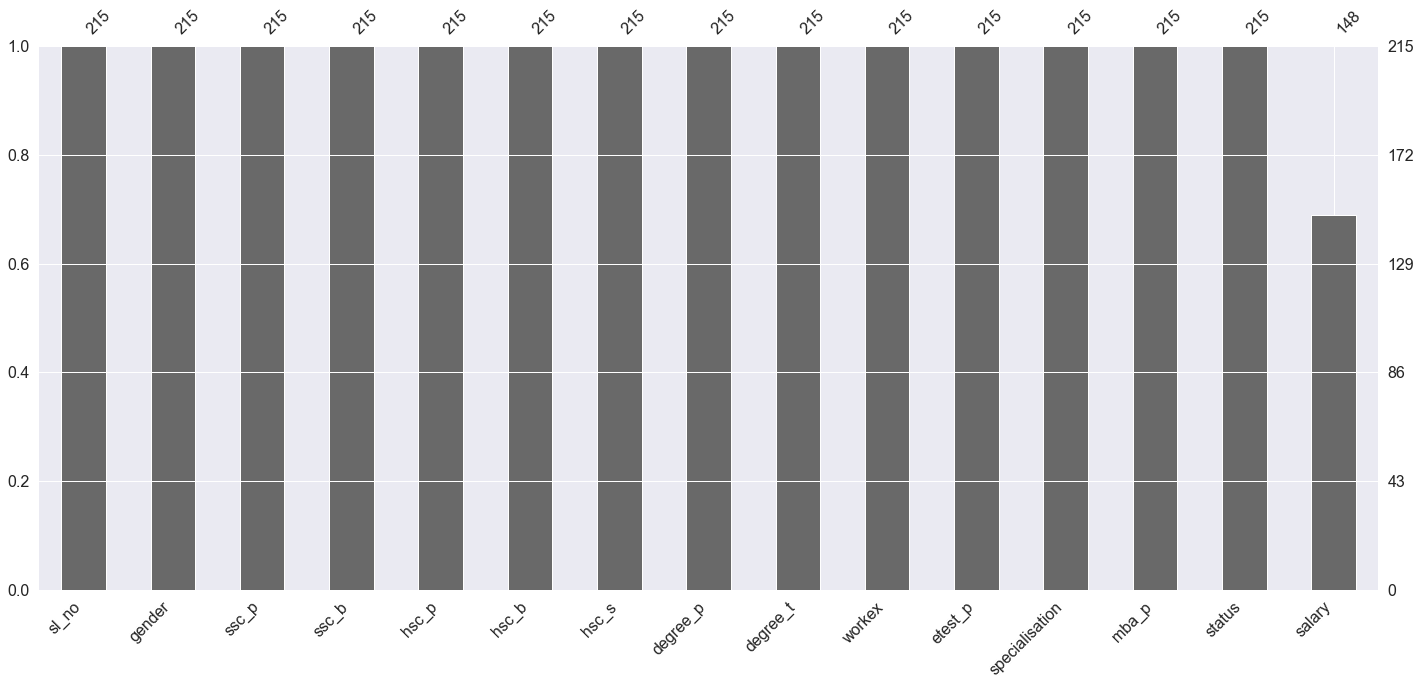

In [9]:
msno.bar(df)

In [10]:
df["salary"] = df["salary"].replace(np.nan, 0)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
round(df.describe(), 2)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,215.00
mean,108.00,67.30,66.33,66.37,72.10,62.28,198702.33
std,62.21,10.83,10.90,7.36,13.28,5.83,154780.93
min,1.00,40.89,37.00,50.00,50.00,51.21,0.00
25%,54.50,60.60,60.90,61.00,60.00,57.94,0.00
50%,108.00,67.00,65.00,66.00,71.00,62.00,240000.00
75%,161.50,75.70,73.00,72.00,83.50,66.26,282500.00
max,215.00,89.40,97.70,91.00,98.00,77.89,940000.00


Text(0.5, 1.0, 'Correlation Between Columns')

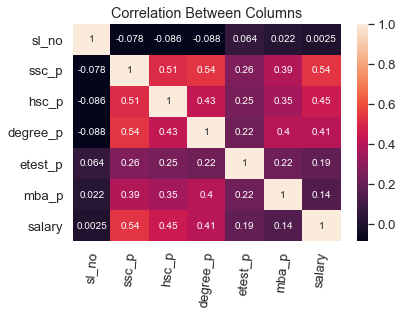

In [12]:
sb.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 85)
plt.title("Correlation Between Columns")

In [13]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [14]:
print("Gender: \n", df["gender"].value_counts(), "\n\nSSC_B: \n", df["ssc_b"].value_counts(), "\n\nHSC_B: \n", df["hsc_b"].value_counts(),
     "\n\nHSC_S: \n", df["hsc_s"].value_counts(), "\n\nDegree_t: \n", df["degree_t"].value_counts(), "\n\nWorkex: \n", df["workex"].value_counts(),
     "\n\nSpecialisation: \n", df["specialisation"].value_counts(), "\n\nStatus: \n", df["status"].value_counts())

Gender: 
 M    139
F     76
Name: gender, dtype: int64 

SSC_B: 
 Central    116
Others      99
Name: ssc_b, dtype: int64 

HSC_B: 
 Others     131
Central     84
Name: hsc_b, dtype: int64 

HSC_S: 
 Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64 

Degree_t: 
 Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64 

Workex: 
 No     141
Yes     74
Name: workex, dtype: int64 

Specialisation: 
 Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64 

Status: 
 Placed        148
Not Placed     67
Name: status, dtype: int64


### Build a model to predict if a student gets placed

The Model Training Score :  0.6544106144321662
[0.         0.         0.83783784 0.91666667 0.         0.
 0.6        0.83783784 0.83783784 0.         1.         1.
 0.83783784 0.83783784 0.         0.         0.91666667 1.
 1.         0.91666667 0.83783784 0.         0.83783784 0.83783784
 0.91666667 0.91666667 0.         1.         0.         0.
 0.         0.6        0.         1.         0.91666667 0.6
 0.91666667 0.83783784 0.83783784 0.91666667 0.83783784 0.91666667
 1.        ]


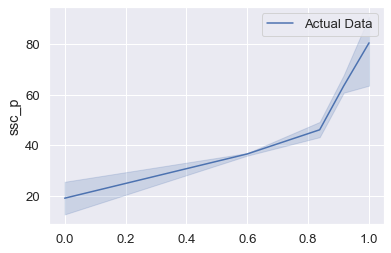

In [29]:
x = df[["ssc_p", "hsc_s"]]

le = LabelEncoder()
x = x.apply(le.fit_transform)

y = df[["status"]]
y = y.apply(le.fit_transform)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = DecisionTreeRegressor(max_depth = 4)
model_fit = model.fit(x_train, y_train)
print("The Model Training Score : ", model_fit.score(x_train, y_train))

pred = model.predict(x_test)
print(pred)
#pred = np.rint(pred)

sb.lineplot(pred, x_test["ssc_p"], label = "Actual Data")
#sb.lineplot(x_test["ssc_p"], pred, label = "Predicted Data")

The Model Training Score:  0.8016369047619047
[1.         1.         1.         0.66666667 1.         1.
 1.         0.5        1.         1.         0.         1.
 0.         1.         1.         0.         1.         1.
 1.         1.         0.         0.5        1.         1.
 1.         1.         1.         0.         0.66666667 1.
 1.         1.         1.         1.         0.         1.
 1.         0.66666667 0.66666667 1.         1.         1.
 1.        ]


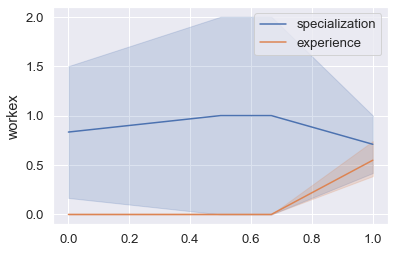

In [32]:
x = df[["degree_p", "degree_t", "workex"]]

le = LabelEncoder()
x = x.apply(le.fit_transform)

y = df[["status"]]
y = y.apply(le.fit_transform)


model = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model_fit = model.fit(x_train, y_train)

print("The Model Training Score: ", model_fit.score(x_train, y_train))

pred = model.predict(x_test)
print(pred)

#sb.lineplot(pred, x_test["degree_p"], label = "degree points")
sb.lineplot(pred, x_test["degree_t"], label = "specialization")
sb.lineplot(pred, x_test["workex"], label = "experience")

Model Training Score:  1.0


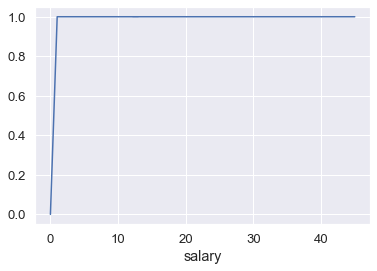

In [17]:
x = df.drop(columns = ["status", "sl_no", "gender"])

le = LabelEncoder()
x = x.apply(le.fit_transform)

y = df[["status"]]
y = y.apply(le.fit_transform)

model = DecisionTreeRegressor(max_depth=4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model_fit = model.fit(x_train, y_train)
pred = model.predict(x_test)

print("Model Training Score: ", model_fit.score(x_train, y_train))

sb.lineplot(x_test["salary"], pred)

In [18]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Classification

In [19]:
x = df.drop(columns = ["status", "gender", "sl_no"])

le = LabelEncoder()

x = x.apply(le.fit_transform)

y = df["status"]

model = DecisionTreeClassifier(max_depth=4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model_fit = model.fit(x_train, y_train)
print(model_fit.score(x_train, y_train))

pred = model.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print(acc_score)

1.0
1.0
